<a href="https://colab.research.google.com/github/Gideon-Muazu/Hamoye_Stage_E_Code/blob/main/Stage_E_Tag_along_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Gideon-Muazu/Time_series_Dataset/main/Time_series_analysis_and_forecast_DATASET.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Text(0, 0.5, 'ElecPrice')

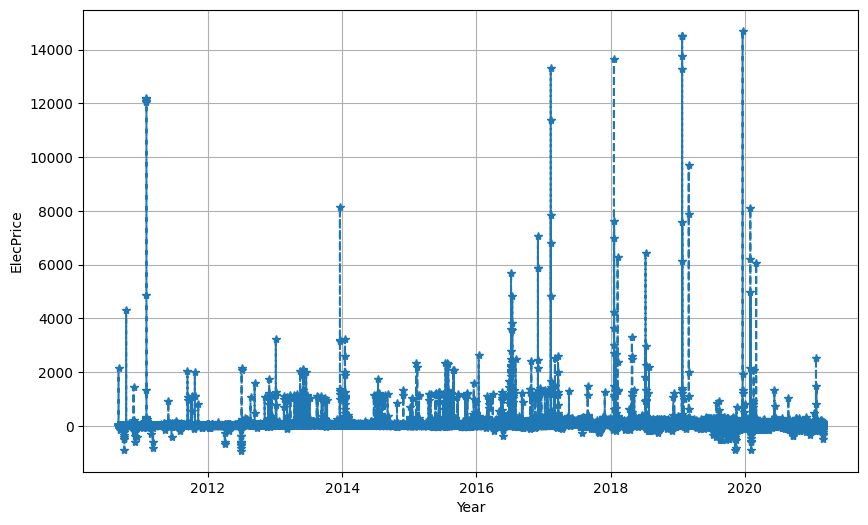

In [6]:
#Conversion to date_time
df["FullDate"] = pd.to_datetime(df["FullDate"])   #convert column to date
df.set_index("FullDate", inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')

In [7]:
#downsampling data to daily data points
df_daily = df.resample('D').sum()
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


Text(0, 0.5, 'Daily active power')

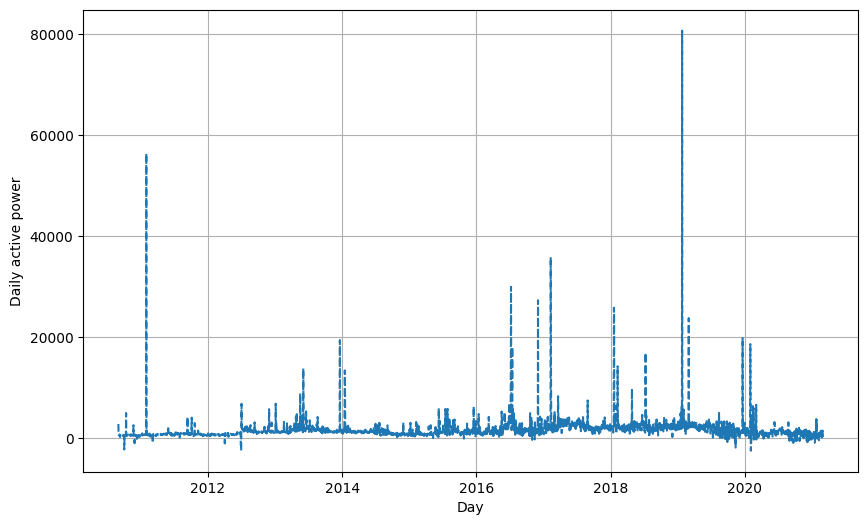

In [8]:
#plot of the daily global active power over time
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice, '--')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Daily active power')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adf_result = adfuller(df_daily['SysLoad'])
print(f'p-value: {round(adf_result[1],6)}')

p-value: 0.004254


In [11]:
adf_result = adfuller(df_daily['GasPrice'])
print(f'p-value: {round(adf_result[1],6)}')

p-value: 0.045027


In [12]:
adf_result = adfuller(df_daily['GasPrice'])
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'{k} : {v}')

Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [13]:
adf_result = adfuller(df_daily['ElecPrice'])
print('Critical values:')
for k, v in adf_result[4].items():
  print(f'{k} : {v}')

Critical values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [14]:
#resetting the index
df_daily = df_daily.reset_index()
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [15]:
# selecting columns for prediction model
model_df = df_daily[['FullDate', 'ElecPrice']]

#renaming of columns to 'ds' and 'y' respectively
model_data = model_df.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

In [16]:
#Train-Test split of the dataset
train = model_data[:2757]
test = model_data[2757:]
print('train shape', train.shape)
print('test shape', test.shape)

train shape (2757, 2)
test shape (1077, 2)


In [17]:
#fitting of the train data to fbprophet model
from prophet import Prophet
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgkl95kcq/z_r_weke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgkl95kcq/pdhzsg9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54238', 'data', 'file=/tmp/tmpgkl95kcq/z_r_weke.json', 'init=/tmp/tmpgkl95kcq/pdhzsg9m.json', 'output', 'file=/tmp/tmpgkl95kcq/prophet_modelj0z6jd61/prophet_model-20230801113347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:33:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:33:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
# Make Predictions
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.522366,85.134229,4984.646054,2684.522366,2684.522366,-157.277098,-157.277098,-157.277098,9.755659,9.755659,9.755659,-167.032757,-167.032757,-167.032757,0.0,0.0,0.0,2527.245268
1,2018-03-21,2685.313840,221.629184,4874.347434,2685.313840,2685.313840,-4.693954,-4.693954,-4.693954,159.421504,159.421504,159.421504,-164.115459,-164.115459,-164.115459,0.0,0.0,0.0,2680.619886
2,2018-03-22,2686.105314,423.324217,5110.968837,2686.105314,2686.105314,93.604040,93.604040,93.604040,257.239178,257.239178,257.239178,-163.635138,-163.635138,-163.635138,0.0,0.0,0.0,2779.709354
3,2018-03-23,2686.896788,360.639462,5037.411246,2686.896788,2686.896788,-115.130706,-115.130706,-115.130706,50.294929,50.294929,50.294929,-165.425635,-165.425635,-165.425635,0.0,0.0,0.0,2571.766082
4,2018-03-24,2687.688263,-138.366937,4703.425165,2687.688263,2687.688263,-440.838320,-440.838320,-440.838320,-271.594004,-271.594004,-271.594004,-169.244315,-169.244315,-169.244315,0.0,0.0,0.0,2246.849943


In [19]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
forecast[['ds','yhat','yhat_lower','yhat_upper','trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2527.245268,85.134229,4984.646054,2684.522366,2684.522366,2684.522366
1,2018-03-21,2680.619886,221.629184,4874.347434,2685.313840,2685.313840,2685.313840
2,2018-03-22,2779.709354,423.324217,5110.968837,2686.105314,2686.105314,2686.105314
3,2018-03-23,2571.766082,360.639462,5037.411246,2686.896788,2686.896788,2686.896788
4,2018-03-24,2246.849943,-138.366937,4703.425165,2687.688263,2687.688263,2687.688263
...,...,...,...,...,...,...,...
1072,2021-02-24,3439.324579,414.724251,6207.596386,3532.982694,1905.811071,5261.615040
1073,2021-02-25,3506.343399,526.243947,6280.138376,3533.774169,1904.184747,5264.590120
1074,2021-02-26,3273.143175,432.149955,6241.358328,3534.565643,1903.260019,5267.154455
1075,2021-02-27,2929.735061,86.752637,5915.781341,3535.357117,1902.335290,5268.953222


In [20]:
#Evaluation of model performance
from sklearn.metrics import mean_squared_error

def mape(test, forecast):
  mape = np.mean(np.abs(np.array(test['y']) - np.array(forecast['yhat']))/ np.array(test['y'])) *100
  rmse = np.sqrt(mean_squared_error(np.array(test['y']), np.array(forecast['yhat'])))
  return f'mape value is: {round(mape,2)} and rmse value is: {round(rmse,2)}'

In [21]:
mape(test, forecast)

'mape value is: -133.2 and rmse value is: 3207.46'

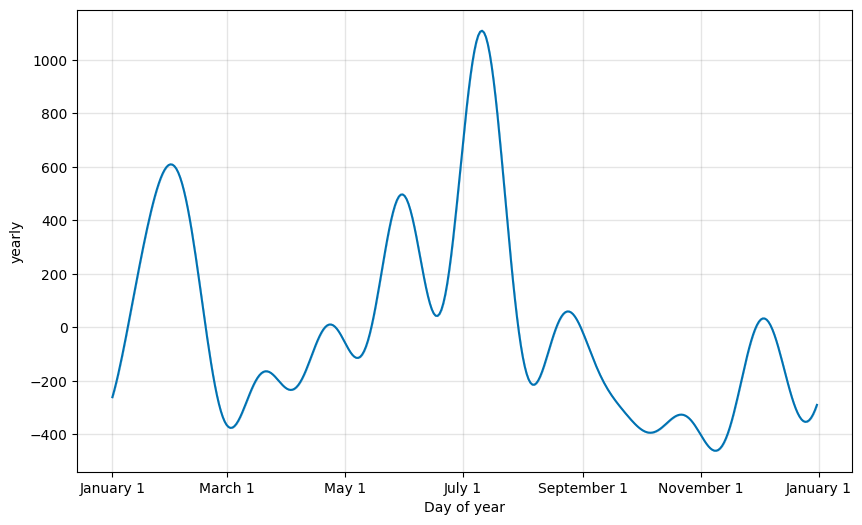

In [22]:
from prophet.plot import plot_yearly
plot_yearly(model)

In [23]:
multi_model = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                         'SysLoad':'add1',
                                         'Tmax':'add2',
                                         'GasPrice':'add3'})
multi_model.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [24]:
# assign train and test data
train2 = multi_model[:2757]
test2 = multi_model[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [25]:
#create multivariate model
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [26]:
model2.fit(train2)

forecast2 = model2.predict(test2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgkl95kcq/_zgi4qe7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgkl95kcq/vpa_xz20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1366', 'data', 'file=/tmp/tmpgkl95kcq/_zgi4qe7.json', 'init=/tmp/tmpgkl95kcq/vpa_xz20.json', 'output', 'file=/tmp/tmpgkl95kcq/prophet_modely1dyndqk/prophet_model-20230801113350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:33:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:33:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1865.204282,-144.128692,4198.653582,1865.204282,1865.204282,-856.253614,-856.253614,-856.253614,0.234389,...,-84.494538,-84.494538,-84.494538,-38.857060,-38.857060,-38.857060,0.0,0.0,0.0,1986.140088
1,2018-03-21,1865.891589,-306.894300,4214.067492,1865.891589,1865.891589,-1026.241961,-1026.241961,-1026.241961,0.231608,...,42.479487,42.479487,42.479487,-29.571833,-29.571833,-29.571833,0.0,0.0,0.0,1977.544546
2,2018-03-22,1866.578897,641.566879,5044.660516,1866.578897,1866.578897,-214.927695,-214.927695,-214.927695,0.218133,...,145.618830,145.618830,145.618830,-24.542320,-24.542320,-24.542320,0.0,0.0,0.0,2897.701501
3,2018-03-23,1867.266204,482.876724,4586.784901,1867.266204,1867.266204,-274.857277,-274.857277,-274.857277,0.210219,...,-44.306420,-44.306420,-44.306420,-23.627175,-23.627175,-23.627175,0.0,0.0,0.0,2581.863394
4,2018-03-24,1867.953512,-931.579399,3561.278514,1867.953512,1867.953512,-1076.279917,-1076.279917,-1076.279917,0.208294,...,-117.532133,-117.532133,-117.532133,-26.575669,-26.575669,-26.575669,0.0,0.0,0.0,1434.816566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,2601.997966,-1428.858502,3326.099619,1824.851079,3385.255950,-1372.139772,-1372.139772,-1372.139772,0.234603,...,42.479487,42.479487,42.479487,-433.536967,-433.536967,-433.536967,0.0,0.0,0.0,954.521071
1073,2021-02-25,2602.685274,-951.367150,3675.289163,1824.749807,3386.568575,-1032.897509,-1032.897509,-1032.897509,0.236314,...,145.618830,145.618830,145.618830,-459.961112,-459.961112,-459.961112,0.0,0.0,0.0,1314.072916
1074,2021-02-26,2603.372581,-895.834821,3956.636931,1824.772458,3387.881199,-754.439530,-754.439530,-754.439530,0.233747,...,-44.306420,-44.306420,-44.306420,-480.615624,-480.615624,-480.615624,0.0,0.0,0.0,1377.886784
1075,2021-02-27,2604.059889,-1309.468378,3595.335265,1824.795110,3389.193824,-1010.868905,-1010.868905,-1010.868905,0.232250,...,-117.532133,-117.532133,-117.532133,-495.262914,-495.262914,-495.262914,0.0,0.0,0.0,1032.792721


In [28]:
def mape_2(test2,forecast2):
  mape2 = np.mean(np.abs(np.array(test2['y']) - np.array(forecast2.yhat))/ np.array(test2['y'])) *100
  rmse2 = np.sqrt(mean_squared_error(np.array(test2['y']),np.array(forecast2['yhat'])))
  return f'mape value is: {round(mape2,2)} and rmse value is: {round(rmse2,2)}'

In [29]:
mape_2(test2,forecast2)

'mape value is: -63.24 and rmse value is: 2707.16'

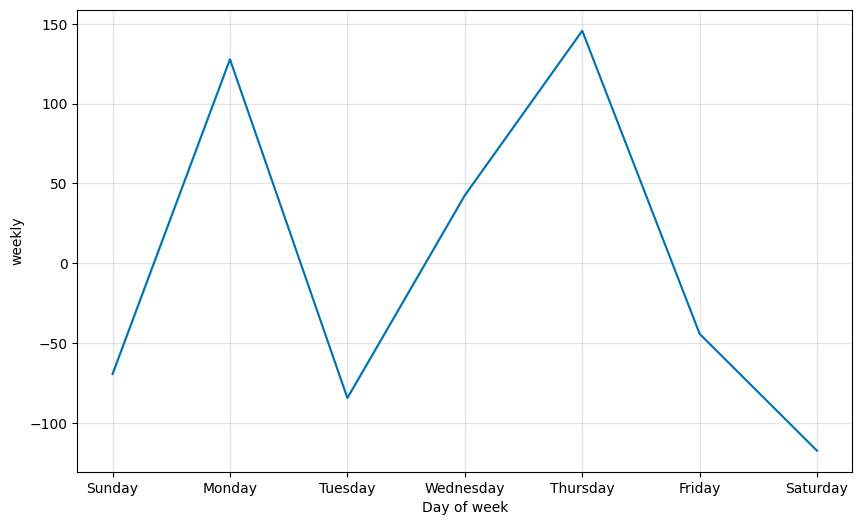

In [30]:
# visualizing each components
from prophet.plot import plot_weekly
plot_weekly(model2)

In [31]:
multi_model_2 = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y','SysLoad':'add1','GasPrice':'add2'})
multi_model_2.drop('Tmax', axis=1,inplace=True)

In [32]:
multi_model_2

,ds,add1,add2,y
0,2010-09-01,41565.38000,88.5600,2751.700
1,2010-09-02,38898.99000,88.5600,570.810
2,2010-09-03,41665.76000,106.8000,504.975
3,2010-09-04,35638.08500,81.3600,502.275
4,2010-09-05,35611.41000,106.8000,500.555
...,...,...,...,...
3829,2021-02-24,-1525.49745,134.4000,634.770
3830,2021-02-25,4539.07855,130.5048,577.515
3831,2021-02-26,9517.02430,130.1808,1445.495
3832,2021-02-27,4932.88015,130.0800,488.980


In [33]:
# assign train and test data
train3 = multi_model_2[:2757]
test3 = multi_model_2[2757:]
print('train shape', train3.shape)
print('test shape', test3.shape)
train3

train shape (2757, 4)
test shape (1077, 4)


,ds,add1,add2,y
0,2010-09-01,41565.38000,88.5600,2751.700
1,2010-09-02,38898.99000,88.5600,570.810
2,2010-09-03,41665.76000,106.8000,504.975
3,2010-09-04,35638.08500,81.3600,502.275
4,2010-09-05,35611.41000,106.8000,500.555
...,...,...,...,...
2752,2018-03-15,27139.02585,220.6272,2717.340
2753,2018-03-16,19710.46400,216.9600,2277.335
2754,2018-03-17,1079.34705,209.0400,1718.385
2755,2018-03-18,-4102.43795,203.9880,1088.015


In [34]:
# Creation of Multivariate model
model3 = Prophet()
model3.add_regressor('add1')
model3.add_regressor('add2')

In [35]:
model3.fit(train3)

forecast3 = model3.predict(test3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgkl95kcq/lfx3njc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgkl95kcq/k2s3uful.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19624', 'data', 'file=/tmp/tmpgkl95kcq/lfx3njc3.json', 'init=/tmp/tmpgkl95kcq/k2s3uful.json', 'output', 'file=/tmp/tmpgkl95kcq/prophet_modelqwtd7ht6/prophet_model-20230801113352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:33:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:33:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
def mape_3(test3,forecast3):
  mape3 = np.mean(np.abs(np.array(test3['y']) - np.array(forecast3.yhat))/ np.array(test3['y'])) *100
  # rmse2 = np.sqrt(mean_squared_error(np.array(test2['y']),np.array(forecast2['yhat'])))
  return f'mape value is: {round(mape3,2)}'


In [37]:
mape_3(test3,forecast3)

'mape value is: -63.32'